# Pipeline Main Workflow

This file defines the main (scaffold) workflow fo the pipeline. The tractorgraphy building block is intended to be freely exchangeable

In [1]:
# Debug stuff! Remove this cell once you're done Simon!
import sys
sys.path.append("/Users/srothmei/Documents/TVB-Pypeline/")

In [2]:
from nipype import Node, Workflow
from nipype.interfaces.utility import IdentityInterface, Function
import bm_functions as brainmodes
import logging

### Inputs parameters

In [3]:
# Later get these from a function input or similar
subject_id = 'FR_20120903'
subject_folder = '/Users/srothmei/Desktop/charite/toronto/'

### Setup

In [4]:
inputNode = Node(IdentityInterface(fields = ['subject_folder', 'subject_id']),
                name = 'input_node')

inputNode.inputs.subject_folder = subject_folder
inputNode.inputs.subject_id = subject_id

### Logging

In [5]:
logging.basicConfig(filename = subject_folder + subject_id + '/pipeline.log', level=logging.DEBUG)

### Utiliy functions

## Preprocessing

In [6]:
import preprocSub as preprocessing

## Functional processing

In [7]:
#funcProcNode = Node(Function(input_names= ['path', 'subName'],
#                            output_names = [],
#                            function = brainmodes.compute_functional_connectivity),
#                    name = 'functional_processing')

## Tractography-Mask generation

In [8]:
maskGenNode = Node(Function(input_names = ['subPath',
                                           'mask_output_folder',
                                           'wmoutline2diff_1mm',
                                           'wmparc2diff_1mm',
                                           'seedsPerVoxel'],
                           output_names = ['seed_target_masks', 'seed_count'],
                           function = brainmodes.generate_masks),
                   name = 'generate_masks')

maskGenNode.inputs.seedsPerVoxel = 200

## Tracking

In [9]:
import mrtrix as mrtrix

## Connectivity

## TVB formatting

In [11]:
mrtrix.mrtrix_main.wf.inputs.input_node


bval_file = <undefined>
bvec_file = <undefined>
dwi_file = <undefined>
seed_count = <undefined>
seed_target_masks = <undefined>
tracking_dir = <undefined>
tracks_dir = <undefined>
wmmask = <undefined>
wmmask_1mm = <undefined>


## Build the Workflow

In [15]:
wf = Workflow(name = 'TVB_pipeline')

wf.connect([
        (inputNode, preprocessing.wf, [('subject_folder', 'input_node.subject_folder'),
                                      ('subject_id', 'input_node.subject_id')]),
        (preprocessing.wf, maskGenNode, [('output_node.subPath', 'subPath'),
                                        ('output_node.mask_folder', 'mask_output_folder'),
                                        ('output_node.wmoutline2diff_1mm', 'wmoutline2diff_1mm'),
                                        ('output_node.wmparc2diff_1mm', 'wmparc2diff_1mm')]),
        (maskGenNode, mrtrix.mrtrix_main.wf, [('seed_target_masks', 'input_node.seed_target_masks'),
                                             ('seed_count', 'input_node.seed_count')]),
        (preprocessing.wf, mrtrix.mrtrix_main.wf, [('output_node.bval_file', 'input_node.bval_file'),
                                                  ('output_node.bvec_file', 'input_node.bvec_file'),
                                                  ('output_node.dwi_file', 'input_node.dwi_file'),
                                                  ('output_node.trackingFolder', 'input_node.tracking_dir'),
                                                  ('output_node.tracks_folder', 'input_node.tracks_dir'),
                                                  ('output_node.highresWmMask', 'input_node.wmmask_1mm'),
                                                  ('output_node.lowresWmMask', 'input_node.wmmask')])
    ])

In [13]:
preprocessing.wf.outputs.output_node


T1RawFolder = None
aparc+aseg2diff = None
aparc+aseg2diff_1mm = None
bval_file = None
bvec_file = None
calc_images = None
dwiPreprocFolder = None
dwiRawFolder = None
dwi_file = None
fmriRawFolder = None
highresWmMask = None
lowresWmMask = None
mask_folder = None
no_diffusion_image = None
rawdataFolder = None
subPath = None
trackingFolder = None
tracks_folder = None
wmSurf = None
wmSurf_lh = None
wmSurf_rh = None
wmoutline2diff = None
wmoutline2diff_1mm = None
wmparc2diff_1mm = None

## Run the Workflow

2015-11-24 17:35:23,337 - INFO - Creating detailed dot file: /Users/srothmei/Documents/TVB-Pypeline/notebooks/workflow_graph_detailed.dot
INFO:workflow:Creating detailed dot file: /Users/srothmei/Documents/TVB-Pypeline/notebooks/workflow_graph_detailed.dot
2015-11-24 17:35:24,182 - INFO - Creating dot file: /Users/srothmei/Documents/TVB-Pypeline/notebooks/workflow_graph.dot
INFO:workflow:Creating dot file: /Users/srothmei/Documents/TVB-Pypeline/notebooks/workflow_graph.dot


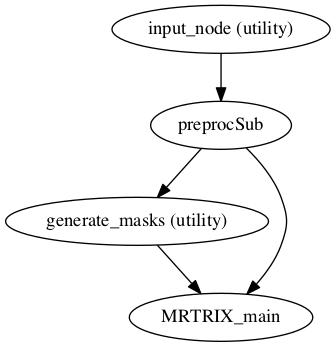

In [16]:
wf.write_graph("workflow_graph.dot", graph2use = 'orig')
from IPython.display import Image
Image(filename="workflow_graph.dot.png")